In [1]:
import os
import sys

os.environ["SPARK_HOME"]=os.path.join(os.path.expanduser("~"),'spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [2]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config('spark.sql.warehouse.dir','C:\Users\qorgk\code\spark')\
    .getOrCreate()

In [3]:
print spark.version

2.0.0


In [38]:
from pyspark.sql import Row
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

sparkㄱㅏ ㅅㅡㅋㅏㄹㄹㅏㄹㅗ ㅁㅏㄴㄷㅡㄹㅇㅓ ㅈㅕㅆㄱㅣ ㄸㅐㅁㅜㄴㅇㅔ
ㅍㅏㅇㅣㅆㅓㄴㅇㅣㅈㅣㅁㅏㄴ ㄷㅔㅇㅣㅌㅓ ㅌㅏㅇㅣㅍㅇㅡㄹ ㅅㅣㄴㄱㅕㅇㅆㅓㅅㅓ ㅅㅏㅇㅛㅇㅎㅐㅇㅑㅎㅏㄴㄷㅏ.

In [5]:
myList=[('1','kim, js',170),
        ('1','lee, sm', 175),
        ('2','lim, yg',180),
        ('2','lee',170)]

In [9]:
myDf = spark.createDataFrame(myList)

In [10]:
myDf.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)



ㅋㅓㄹㄹㅓㅁㅁㅕㅇㅇㅣ ㅈㅏㄷㅗㅇㅇㅡㄹㅗ ㅈㅜㅇㅓㅈㅣㅁ ㄷㅔㅇㅣㅌㅓ ㅌㅏㅇㅣㅍㄷㅗ ㅈㅏㄷㅗㅇㅇㅡㄹㅗ ㅇㅠㅊㅜㄷㅗㅣㅁ nullableㅇㅡㄴ ㅅㅔㄹㄱㅏㅂㅅㅇㅣ ㅂㅣㅇㅓㅇㅣㅆㅇㅡㄹ ㅅㅜㄷㅗ ㅇㅣㅆㄷㅏㄴㅡㄴ ㄸㅡㅅㅇㅣㅁ

In [11]:
print myDf.take(1)

[Row(_1=u'1', _2=u'kim, js', _3=170)]


In [12]:
print spark.createDataFrame(myList, ['year','name','height']).take(1)

[Row(year=u'1', name=u'kim, js', height=170)]


In [13]:
names = ["kim","lee","lee","lim"]
items = ["espresso","latte","americano","affocato","long black","macciato"]
df = spark.createDataFrame([(names[i%4], items[i%6]) for i in range(100)],\
                           ["name","item"])
df.show(10)

+----+----------+
|name|      item|
+----+----------+
| kim|  espresso|
| lee|     latte|
| lee| americano|
| lim|  affocato|
| kim|long black|
| lee|  macciato|
| lee|  espresso|
| lim|     latte|
| kim| americano|
| lee|  affocato|
+----+----------+
only showing top 10 rows



In [14]:
df.select(df.item.substr(1, 3).alias("short name")).show(3)

+----------+
|short name|
+----------+
|       esp|
|       lat|
|       ame|
+----------+
only showing top 3 rows



In [16]:
from pyspark.sql import Row
Person = Row('year','name', 'height')
row1=Person('1','kim, js',170)
print "row1: ", row1.year, row1.name

row1:  1 kim, js


In [17]:
myRows = [row1,
          Person('1','lee, sm', 175),
          Person('2','lim, yg',180),
          Person('2','lee',170)]

In [18]:
myDf=spark.createDataFrame(myRows)

In [19]:
print myDf.printSchema()
myDf.show()

root
 |-- year: string (nullable = true)
 |-- name: string (nullable = true)
 |-- height: long (nullable = true)

None
+----+-------+------+
|year|   name|height|
+----+-------+------+
|   1|kim, js|   170|
|   1|lee, sm|   175|
|   2|lim, yg|   180|
|   2|    lee|   170|
+----+-------+------+



In [21]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
mySchema=StructType([
    StructField("year", StringType(), True),
    StructField("name", StringType(), True),
    StructField("height", IntegerType(), True)
])

In [22]:
myDf=spark.createDataFrame(myRows, mySchema)
myDf.printSchema()
myDf.take(1)

root
 |-- year: string (nullable = true)
 |-- name: string (nullable = true)
 |-- height: integer (nullable = true)



[Row(year=u'1', name=u'kim, js', height=170)]

In [15]:
from pyspark.sql import Row

myList=[('1','kim, js',170),('1','lee, sm', 175),('2','lim, yg',180),('2','lee',170)]

In [16]:
myRdd = spark.sparkContext.parallelize(myList)

In [17]:
rddDf=myRdd.toDF()
rddDf.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)



In [18]:
rddDf=spark.createDataFrame(myRdd)
rddDf.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)



In [19]:
rddDf.where(rddDf._3 < 175).select([rddDf._1, rddDf._2]).show()

+---+-------+
| _1|     _2|
+---+-------+
|  1|kim, js|
|  2|    lee|
+---+-------+



where ㅎㅐㅇ
select ㅇㅕㄹ

In [20]:
rddDf.groupby(rddDf._1).max().show()

+---+-------+
| _1|max(_3)|
+---+-------+
|  1|    175|
|  2|    180|
+---+-------+



byㄴㅡㄴ keyㅂㅕㄹ

In [21]:
_myRdd=myRdd.map(lambda x:Row(year=int(x[0]),name=x[1],height=int(x[2])))

In [22]:
_myDf=spark.createDataFrame(_myRdd)

In [23]:
_myDf.printSchema()
_myDf.take(1)

root
 |-- height: long (nullable = true)
 |-- name: string (nullable = true)
 |-- year: long (nullable = true)



[Row(height=170, name=u'kim, js', year=1)]

In [34]:
from pyspark.sql import Row
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import StringType, IntegerType, TimestampType
r1=Row(name="js1",age=10)
r2=Row(name="js2",age=20)
_myRdd=spark.sparkContext.parallelize([r1,r2])

In [35]:
_myRdd.collect()

[Row(age=10, name='js1'), Row(age=20, name='js2')]

In [36]:
schema=StructType([
    StructField("age", IntegerType(), True),
    StructField("name", StringType(), True),
    #StructField("created", TimestampType(), True)
])
_myDf=spark.createDataFrame(_myRdd,schema)
_myDf.printSchema()
_myDf.show()

root
 |-- age: integer (nullable = true)
 |-- name: string (nullable = true)

+---+----+
|age|name|
+---+----+
| 10| js1|
| 20| js2|
+---+----+



In [37]:
from pyspark.sql.types import *
myRdd=spark.sparkContext.parallelize([(1, 'kim', 50.0), (2, 'lee', 60.0), (3, 'park', 70.0)])
schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("name", StringType(), True),
    StructField("height", DoubleType(), True)
])
_myDf = spark.createDataFrame(myRdd, schema)
_myDf.printSchema()
_myDf.show()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- height: double (nullable = true)

+---+----+------+
| id|name|height|
+---+----+------+
|  1| kim|  50.0|
|  2| lee|  60.0|
|  3|park|  70.0|
+---+----+------+



In [38]:
myDf.toPandas()

,year,name,height
0,1,"kim, js",170
1,1,"lee, sm",175
2,2,"lim, yg",180
3,2,lee,170


In [40]:
myDf.write.format('com.databricks.spark.csv').save(os.path.join('data','_myDf.csv'))

In [48]:
!dir "data/_myDf.csv/"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 8EE8-038A

 C:\Users\qorgk\code\spark\data\_myDf.csv 디렉터리

2019-10-08  오후 04:22    <DIR>          .
2019-10-08  오후 04:22    <DIR>          ..
2019-10-08  오후 04:22                12 .part-r-00000-aea5e80f-e6b4-4547-b5fb-bfcbbbbc6ead.csv.crc
2019-10-08  오후 04:22                12 .part-r-00001-aea5e80f-e6b4-4547-b5fb-bfcbbbbc6ead.csv.crc
2019-10-08  오후 04:22                 8 ._SUCCESS.crc
2019-10-08  오후 04:22                32 part-r-00000-aea5e80f-e6b4-4547-b5fb-bfcbbbbc6ead.csv
2019-10-08  오후 04:22                26 part-r-00001-aea5e80f-e6b4-4547-b5fb-bfcbbbbc6ead.csv
2019-10-08  오후 04:22                 0 _SUCCESS
               6개 파일                  90 바이트
               2개 디렉터리  442,167,955,456 바이트 남음


In [45]:
myDf.toPandas().to_csv(os.path.join('data','myDf.csv'))

web data ㅊㅓㄹㅣ
1. HTML
2. JSON
 - {k,v} k:column,v:value
3. XML



In [51]:
%%writefile src/ds_twitter_seoul_3.json
{"contributors": null, "truncated": false, "text": "RT @soompi: #SEVENTEEN’s Mingyu, Jin Se Yeon, And Leeteuk To MC For 2016 Super Seoul Dream Concert \nhttps://t.co/1XRSaRBbE0 https://t.co/fi…", "is_quote_status": false, "in_reply_to_status_id": null, "id": 801657325836763136, "favorite_count": 0, "entities": {"symbols": [], "user_mentions": [{"id": 17659206, "indices": [3, 10], "id_str": "17659206", "screen_name": "soompi", "name": "Soompi"}], "hashtags": [{"indices": [12, 22], "text": "SEVENTEEN"}], "urls": [{"url": "https://t.co/1XRSaRBbE0", "indices": [100, 123], "expanded_url": "http://www.soompi.com/2016/11/20/seventeens-mingyu-jin-se-yeon-leeteuk-mc-dream-concert/", "display_url": "soompi.com/2016/11/20/sev…"}]}, "retweeted": false, "coordinates": null, "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>", "in_reply_to_screen_name": null, "in_reply_to_user_id": null, "retweet_count": 1487, "id_str": "801657325836763136", "favorited": false, "retweeted_status": {"contributors": null, "truncated": false, "text": "#SEVENTEEN’s Mingyu, Jin Se Yeon, And Leeteuk To MC For 2016 Super Seoul Dream Concert \nhttps://t.co/1XRSaRBbE0 https://t.co/fifXHpF8or", "is_quote_status": false, "in_reply_to_status_id": null, "id": 800593781586132993, "favorite_count": 1649, "entities": {"symbols": [], "user_mentions": [], "hashtags": [{"indices": [0, 10], "text": "SEVENTEEN"}], "urls": [{"url": "https://t.co/1XRSaRBbE0", "indices": [88, 111], "expanded_url": "http://www.soompi.com/2016/11/20/seventeens-mingyu-jin-se-yeon-leeteuk-mc-dream-concert/", "display_url": "soompi.com/2016/11/20/sev…"}], "media": [{"expanded_url": "https://twitter.com/soompi/status/800593781586132993/photo/1", "display_url": "pic.twitter.com/fifXHpF8or", "url": "https://t.co/fifXHpF8or", "media_url_https": "https://pbs.twimg.com/media/CxxHMk8UsAA4cUT.jpg", "id_str": "800593115165798400", "sizes": {"small": {"h": 382, "resize": "fit", "w": 680}, "large": {"h": 449, "resize": "fit", "w": 800}, "medium": {"h": 449, "resize": "fit", "w": 800}, "thumb": {"h": 150, "resize": "crop", "w": 150}}, "indices": [112, 135], "type": "photo", "id": 800593115165798400, "media_url": "http://pbs.twimg.com/media/CxxHMk8UsAA4cUT.jpg"}]}, "retweeted": false, "coordinates": null, "source": "<a href=\"https://about.twitter.com/products/tweetdeck\" rel=\"nofollow\">TweetDeck</a>", "in_reply_to_screen_name": null, "in_reply_to_user_id": null, "retweet_count": 1487, "id_str": "800593781586132993", "favorited": false, "user": {"follow_request_sent": false, "has_extended_profile": true, "profile_use_background_image": true, "default_profile_image": false, "id": 17659206, "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/699864769/1cdde0a85f5c0a994ae1fb06d545a5ec.png", "verified": true, "translator_type": "none", "profile_text_color": "999999", "profile_image_url_https": "https://pbs.twimg.com/profile_images/792117259489583104/4khJk3zz_normal.jpg", "profile_sidebar_fill_color": "000000", "entities": {"url": {"urls": [{"url": "http://t.co/3evT80UlR9", "indices": [0, 22], "expanded_url": "http://www.soompi.com", "display_url": "soompi.com"}]}, "description": {"urls": []}}, "followers_count": 987867, "profile_sidebar_border_color": "000000", "id_str": "17659206", "profile_background_color": "1E1E1E", "listed_count": 3982, "is_translation_enabled": true, "utc_offset": -28800, "statuses_count": 80038, "description": "The original K-pop community. We take gifs, OTPs, and reporting on your bias' fashion choices seriously. But not rumors. Ain't nobody got time for that.", "friends_count": 3532, "location": "Worldwide", "profile_link_color": "31B6F4", "profile_image_url": "http://pbs.twimg.com/profile_images/792117259489583104/4khJk3zz_normal.jpg", "following": false, "geo_enabled": false, "profile_banner_url": "https://pbs.twimg.com/profile_banners/17659206/1478803767", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/699864769/1cdde0a85f5c0a994ae1fb06d545a5ec.png", "screen_name": "soompi", "lang": "en", "profile_background_tile": true, "favourites_count": 1493, "name": "Soompi", "notifications": false, "url": "http://t.co/3evT80UlR9", "created_at": "Wed Nov 26 20:48:27 +0000 2008", "contributors_enabled": false, "time_zone": "Pacific Time (US & Canada)", "protected": false, "default_profile": false, "is_translator": false}, "geo": null, "in_reply_to_user_id_str": null, "possibly_sensitive": false, "lang": "en", "created_at": "Mon Nov 21 06:56:46 +0000 2016", "in_reply_to_status_id_str": null, "place": null, "extended_entities": {"media": [{"expanded_url": "https://twitter.com/soompi/status/800593781586132993/photo/1", "display_url": "pic.twitter.com/fifXHpF8or", "url": "https://t.co/fifXHpF8or", "media_url_https": "https://pbs.twimg.com/media/CxxHMk8UsAA4cUT.jpg", "id_str": "800593115165798400", "sizes": {"small": {"h": 382, "resize": "fit", "w": 680}, "large": {"h": 449, "resize": "fit", "w": 800}, "medium": {"h": 449, "resize": "fit", "w": 800}, "thumb": {"h": 150, "resize": "crop", "w": 150}}, "indices": [112, 135], "type": "photo", "id": 800593115165798400, "media_url": "http://pbs.twimg.com/media/CxxHMk8UsAA4cUT.jpg"}]}, "metadata": {"iso_language_code": "en", "result_type": "recent"}}, "user": {"follow_request_sent": false, "has_extended_profile": false, "profile_use_background_image": true, "default_profile_image": true, "id": 791090169818521600, "profile_background_image_url_https": null, "verified": false, "translator_type": "none", "profile_text_color": "333333", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_6_normal.png", "profile_sidebar_fill_color": "DDEEF6", "entities": {"description": {"urls": []}}, "followers_count": 0, "profile_sidebar_border_color": "C0DEED", "id_str": "791090169818521600", "profile_background_color": "F5F8FA", "listed_count": 0, "is_translation_enabled": false, "utc_offset": null, "statuses_count": 96, "description": "", "friends_count": 7, "location": "", "profile_link_color": "1DA1F2", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_6_normal.png", "following": false, "geo_enabled": false, "profile_background_image_url": null, "screen_name": "enriquesanq", "lang": "es", "profile_background_tile": false, "favourites_count": 161, "name": "Enrique santos", "notifications": false, "url": null, "created_at": "Wed Oct 26 01:32:49 +0000 2016", "contributors_enabled": false, "time_zone": null, "protected": false, "default_profile": true, "is_translator": false}, "geo": null, "in_reply_to_user_id_str": null, "possibly_sensitive": false, "lang": "en", "created_at": "Thu Nov 24 05:22:55 +0000 2016", "in_reply_to_status_id_str": null, "place": null, "metadata": {"iso_language_code": "en", "result_type": "recent"}}


Writing src/ds_twitter_seoul_3.json


In [52]:
import os
_jfname=os.path.join('src','ds_twitter_seoul_3.json')
with open(_jfname, 'rb') as f:
    data = f.readlines()

with open : ㅇㅣㄹㄱㅇㅡㄴ ㅍㅏㅇㅣㄹㅇㅡㄹ closed ㅎㅐㅈㅜㅈㅣ ㅇㅏㄴㅎㅇㅏㄷㅗ ㄱㅗㅐㄴㅊㅜㄴ

In [53]:
#jsonㅇㅡㄴ stringㅇㅡㄹㅗ ㅈㅓㅈㅏㅇㄷㅗㅣㄱㅗ ㅅㅏㅇㅛㅇㅎㅏㄹ ㄸㅐ ㅍㅏㅅㅣㅇㅎㅐㅈㅜㅇㅓㅇㅑㅎㅏㄴㄷㅏ.
data

['{"contributors": null, "truncated": false, "text": "RT @soompi: #SEVENTEEN\xe2\x80\x99s Mingyu, Jin Se Yeon, And Leeteuk To MC For 2016 Super Seoul Dream Concert \\nhttps://t.co/1XRSaRBbE0 https://t.co/fi\xe2\x80\xa6", "is_quote_status": false, "in_reply_to_status_id": null, "id": 801657325836763136, "favorite_count": 0, "entities": {"symbols": [], "user_mentions": [{"id": 17659206, "indices": [3, 10], "id_str": "17659206", "screen_name": "soompi", "name": "Soompi"}], "hashtags": [{"indices": [12, 22], "text": "SEVENTEEN"}], "urls": [{"url": "https://t.co/1XRSaRBbE0", "indices": [100, 123], "expanded_url": "http://www.soompi.com/2016/11/20/seventeens-mingyu-jin-se-yeon-leeteuk-mc-dream-concert/", "display_url": "soompi.com/2016/11/20/sev\xe2\x80\xa6"}]}, "retweeted": false, "coordinates": null, "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "in_reply_to_screen_name": null, "in_reply_to_user_id": null, "retweet_count": 1487, "

In [54]:
data = map(lambda x: x.rstrip(), data)

In [61]:
",".join(["A", "B", "C"]) # A,B,C ㅇㅕㄴㄱㅕㄹㅈㅏ,

'A,B,C'

In [56]:
"+".join(["A", "B", "C"]) #ㅇㅕㄴㄱㅕㄹㅈㅏ +

'A+B+C'

In [62]:
data_json_str = "[" + ','.join(data) + "]"

In [63]:
len(data_json_str)

6908

In [64]:
import pandas as pd

data_df = pd.read_json(data_json_str)

In [65]:
print data_df.count() #count ㅎㅐㅇㅇㅡㅣ ㄱㅐㅅㅜ

contributors                 0
coordinates                  0
created_at                   1
entities                     1
favorite_count               1
favorited                    1
geo                          0
id                           1
id_str                       1
in_reply_to_screen_name      0
in_reply_to_status_id        0
in_reply_to_status_id_str    0
in_reply_to_user_id          0
in_reply_to_user_id_str      0
is_quote_status              1
lang                         1
metadata                     1
place                        0
possibly_sensitive           1
retweet_count                1
retweeted                    1
retweeted_status             1
source                       1
text                         1
truncated                    1
user                         1
dtype: int64


In [66]:
data_df['id'][:10]

0    801657325836763136
Name: id, dtype: int64

In [67]:
from pyspark.sql import Row
cfile= os.path.join(os.environ["SPARK_HOME"],\
           "examples/src/main/resources/people.txt")
lines = spark.sparkContext.textFile(cfile)

In [68]:
parts = lines.map(lambda l: l.split(","))
people = parts.map(lambda p: Row(name=p[0], age=int(p[1].strip())))

_myDf = spark.createDataFrame(people)

In [69]:
_myDf.printSchema()
_myDf.collect()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



[Row(age=29, name=u'Michael'),
 Row(age=30, name=u'Andy'),
 Row(age=19, name=u'Justin')]

In [33]:
Df = spark.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('data/publicBike.csv')

In [34]:
Df.show()
Df.printSchema()

+--------------------+-----+
|              �뿩����|�뿩�Ǽ�|
+--------------------+-----+
|2018-01-01 00:00:...| 4950|
|2018-01-02 00:00:...| 7136|
|2018-01-03 00:00:...| 7156|
|2018-01-04 00:00:...| 7102|
|2018-01-05 00:00:...| 7705|
|2018-01-06 00:00:...| 5681|
|2018-01-07 00:00:...| 5220|
|2018-01-08 00:00:...| 6309|
|2018-01-09 00:00:...| 5988|
|2018-01-10 00:00:...| 4476|
|2018-01-11 00:00:...| 4337|
|2018-01-12 00:00:...| 4401|
|2018-01-13 00:00:...| 3756|
|2018-01-14 00:00:...| 4675|
|2018-01-15 00:00:...| 6993|
|2018-01-16 00:00:...| 7421|
|2018-01-17 00:00:...| 6990|
|2018-01-18 00:00:...| 7054|
|2018-01-19 00:00:...| 8329|
|2018-01-20 00:00:...| 6148|
+--------------------+-----+
only showing top 20 rows

root
 |-- �뿩����: timestamp (nullable = true)
 |-- �뿩�Ǽ�: integer (nullable = true)



In [35]:
Df=Df.withColumnRenamed('�뿩����','date')
Df=Df.withColumnRenamed('�뿩�Ǽ�','count')

In [36]:
Df.show()
Df.printSchema()

+--------------------+-----+
|                date|count|
+--------------------+-----+
|2018-01-01 00:00:...| 4950|
|2018-01-02 00:00:...| 7136|
|2018-01-03 00:00:...| 7156|
|2018-01-04 00:00:...| 7102|
|2018-01-05 00:00:...| 7705|
|2018-01-06 00:00:...| 5681|
|2018-01-07 00:00:...| 5220|
|2018-01-08 00:00:...| 6309|
|2018-01-09 00:00:...| 5988|
|2018-01-10 00:00:...| 4476|
|2018-01-11 00:00:...| 4337|
|2018-01-12 00:00:...| 4401|
|2018-01-13 00:00:...| 3756|
|2018-01-14 00:00:...| 4675|
|2018-01-15 00:00:...| 6993|
|2018-01-16 00:00:...| 7421|
|2018-01-17 00:00:...| 6990|
|2018-01-18 00:00:...| 7054|
|2018-01-19 00:00:...| 8329|
|2018-01-20 00:00:...| 6148|
+--------------------+-----+
only showing top 20 rows

root
 |-- date: timestamp (nullable = true)
 |-- count: integer (nullable = true)



In [46]:
split_col = pyspark.sql.functions.split(Df['date'], '-')
Df = Df.withColumn('year', split_col.getItem(0))

In [47]:
Df.show()
Df.printSchema()

+--------------------+-----+----+
|                date|count|year|
+--------------------+-----+----+
|2018-01-01 00:00:...| 4950|2018|
|2018-01-02 00:00:...| 7136|2018|
|2018-01-03 00:00:...| 7156|2018|
|2018-01-04 00:00:...| 7102|2018|
|2018-01-05 00:00:...| 7705|2018|
|2018-01-06 00:00:...| 5681|2018|
|2018-01-07 00:00:...| 5220|2018|
|2018-01-08 00:00:...| 6309|2018|
|2018-01-09 00:00:...| 5988|2018|
|2018-01-10 00:00:...| 4476|2018|
|2018-01-11 00:00:...| 4337|2018|
|2018-01-12 00:00:...| 4401|2018|
|2018-01-13 00:00:...| 3756|2018|
|2018-01-14 00:00:...| 4675|2018|
|2018-01-15 00:00:...| 6993|2018|
|2018-01-16 00:00:...| 7421|2018|
|2018-01-17 00:00:...| 6990|2018|
|2018-01-18 00:00:...| 7054|2018|
|2018-01-19 00:00:...| 8329|2018|
|2018-01-20 00:00:...| 6148|2018|
+--------------------+-----+----+
only showing top 20 rows

root
 |-- date: timestamp (nullable = true)
 |-- count: integer (nullable = true)
 |-- year: string (nullable = true)



In [51]:
Df.groupBy('year').sum('count').show()          
Df.groupBy('year').count().show()    

+----+----------+
|year|sum(count)|
+----+----------+
|2019|   1871935|
|2018|  10124874|
+----+----------+

+----+-----+
|year|count|
+----+-----+
|2019|   90|
|2018|  365|
+----+-----+



In [4]:
import numpy as np

In [5]:
np.array([float(x) for x in '1.658985	4.285136'.split('\t')])

array([1.658985, 4.285136])

In [6]:
np.array([float(x) for x in '1.658985 4.285136'.split(' ')])

array([1.658985, 4.285136])

In [7]:
%%writefile data/ds_spark_heightweight.txt
1	65.78	112.99
2	71.52	136.49
3	69.40	153.03
4	68.22	142.34
5	67.79	144.30
6	68.70	123.30
7	69.80	141.49
8	70.01	136.46
9	67.90	112.37
10	66.78	120.67
11	66.49	127.45
12	67.62	114.14
13	68.30	125.61
14	67.12	122.46
15	68.28	116.09
16	71.09	140.00
17	66.46	129.50
18	68.65	142.97
19	71.23	137.90
20	67.13	124.04
21	67.83	141.28
22	68.88	143.54
23	63.48	97.90
24	68.42	129.50
25	67.63	141.85
26	67.21	129.72
27	70.84	142.42
28	67.49	131.55
29	66.53	108.33
30	65.44	113.89
31	69.52	103.30
32	65.81	120.75
33	67.82	125.79
34	70.60	136.22
35	71.80	140.10
36	69.21	128.75
37	66.80	141.80
38	67.66	121.23
39	67.81	131.35
40	64.05	106.71
41	68.57	124.36
42	65.18	124.86
43	69.66	139.67
44	67.97	137.37
45	65.98	106.45
46	68.67	128.76
47	66.88	145.68
48	67.70	116.82
49	69.82	143.62
50	69.09	134.93
51	69.91	147.02
52	67.33	126.33
53	70.27	125.48
54	69.10	115.71
55	65.38	123.49
56	70.18	147.89
57	70.41	155.90
58	66.54	128.07
59	66.36	119.37
60	67.54	133.81
61	66.50	128.73
62	69.00	137.55
63	68.30	129.76
64	67.01	128.82
65	70.81	135.32
66	68.22	109.61
67	69.06	142.47
68	67.73	132.75
69	67.22	103.53
70	67.37	124.73
71	65.27	129.31
72	70.84	134.02
73	69.92	140.40
74	64.29	102.84
75	68.25	128.52
76	66.36	120.30
77	68.36	138.60
78	65.48	132.96
79	69.72	115.62
80	67.73	122.52
81	68.64	134.63
82	66.78	121.90
83	70.05	155.38
84	66.28	128.94
85	69.20	129.10
86	69.13	139.47
87	67.36	140.89
88	70.09	131.59
89	70.18	121.12
90	68.23	131.51
91	68.13	136.55
92	70.24	141.49
93	71.49	140.61
94	69.20	112.14
95	70.06	133.46
96	70.56	131.80
97	66.29	120.03
98	63.43	123.10
99	66.77	128.14
100	68.89	115.48
101	64.87	102.09
102	67.09	130.35
103	68.35	134.18
104	65.61	98.64
105	67.76	114.56
106	68.02	123.49
107	67.66	123.05
108	66.31	126.48
109	69.44	128.42
110	63.84	127.19
111	67.72	122.06
112	70.05	127.61
113	70.19	131.64
114	65.95	111.90
115	70.01	122.04
116	68.61	128.55
117	68.81	132.68
118	69.76	136.06
119	65.46	115.94
120	68.83	136.90
121	65.80	119.88
122	67.21	109.01
123	69.42	128.27
124	68.94	135.29
125	67.94	106.86
126	65.63	123.29
127	66.50	109.51
128	67.93	119.31
129	68.89	140.24
130	70.24	133.98
131	68.27	132.58
132	71.23	130.70
133	69.10	115.56
134	64.40	123.79
135	71.10	128.14
136	68.22	135.96
137	65.92	116.63
138	67.44	126.82
139	73.90	151.39
140	69.98	130.40
141	69.52	136.21
142	65.18	113.40
143	68.01	125.33
144	68.34	127.58
145	65.18	107.16
146	68.26	116.46
147	68.57	133.84
148	64.50	112.89
149	68.71	130.76
150	68.89	137.76
151	69.54	125.40
152	67.40	138.47
153	66.48	120.82
154	66.01	140.15
155	72.44	136.74
156	64.13	106.11
157	70.98	158.96
158	67.50	108.79
159	72.02	138.78
160	65.31	115.91
161	67.08	146.29
162	64.39	109.88
163	69.37	139.05
164	68.38	119.90
165	65.31	128.31
166	67.14	127.24
167	68.39	115.23
168	66.29	124.80
169	67.19	126.95
170	65.99	111.27
171	69.43	122.61
172	67.97	124.21
173	67.76	124.65
174	65.28	119.52
175	73.83	139.30
176	66.81	104.83
177	66.89	123.04
178	65.74	118.89
179	65.98	121.49
180	66.58	119.25
181	67.11	135.02
182	65.87	116.23
183	66.78	109.17
184	68.74	124.22
185	66.23	141.16
186	65.96	129.15
187	68.58	127.87
188	66.59	120.92
189	66.97	127.65
190	68.08	101.47
191	70.19	144.99
192	65.52	110.95
193	67.46	132.86
194	67.41	146.34
195	69.66	145.59
196	65.80	120.84
197	66.11	115.78
198	68.24	128.30
199	68.02	127.47
200	71.39	127.88

Writing data/ds_spark_heightweight.txt


In [ ]:
# %load data/ds_spark_heightweight.txt
1	65.78	112.99
2	71.52	136.49
3	69.40	153.03
4	68.22	142.34
5	67.79	144.30
6	68.70	123.30
7	69.80	141.49
8	70.01	136.46
9	67.90	112.37
10	66.78	120.67
11	66.49	127.45
12	67.62	114.14
13	68.30	125.61
14	67.12	122.46
15	68.28	116.09
16	71.09	140.00
17	66.46	129.50
18	68.65	142.97
19	71.23	137.90
20	67.13	124.04
21	67.83	141.28
22	68.88	143.54
23	63.48	97.90
24	68.42	129.50
25	67.63	141.85
26	67.21	129.72
27	70.84	142.42
28	67.49	131.55
29	66.53	108.33
30	65.44	113.89
31	69.52	103.30
32	65.81	120.75
33	67.82	125.79
34	70.60	136.22
35	71.80	140.10
36	69.21	128.75
37	66.80	141.80
38	67.66	121.23
39	67.81	131.35
40	64.05	106.71
41	68.57	124.36
42	65.18	124.86
43	69.66	139.67
44	67.97	137.37
45	65.98	106.45
46	68.67	128.76
47	66.88	145.68
48	67.70	116.82
49	69.82	143.62
50	69.09	134.93
51	69.91	147.02
52	67.33	126.33
53	70.27	125.48
54	69.10	115.71
55	65.38	123.49
56	70.18	147.89
57	70.41	155.90
58	66.54	128.07
59	66.36	119.37
60	67.54	133.81
61	66.50	128.73
62	69.00	137.55
63	68.30	129.76
64	67.01	128.82
65	70.81	135.32
66	68.22	109.61
67	69.06	142.47
68	67.73	132.75
69	67.22	103.53
70	67.37	124.73
71	65.27	129.31
72	70.84	134.02
73	69.92	140.40
74	64.29	102.84
75	68.25	128.52
76	66.36	120.30
77	68.36	138.60
78	65.48	132.96
79	69.72	115.62
80	67.73	122.52
81	68.64	134.63
82	66.78	121.90
83	70.05	155.38
84	66.28	128.94
85	69.20	129.10
86	69.13	139.47
87	67.36	140.89
88	70.09	131.59
89	70.18	121.12
90	68.23	131.51
91	68.13	136.55
92	70.24	141.49
93	71.49	140.61
94	69.20	112.14
95	70.06	133.46
96	70.56	131.80
97	66.29	120.03
98	63.43	123.10
99	66.77	128.14
100	68.89	115.48
101	64.87	102.09
102	67.09	130.35
103	68.35	134.18
104	65.61	98.64
105	67.76	114.56
106	68.02	123.49
107	67.66	123.05
108	66.31	126.48
109	69.44	128.42
110	63.84	127.19
111	67.72	122.06
112	70.05	127.61
113	70.19	131.64
114	65.95	111.90
115	70.01	122.04
116	68.61	128.55
117	68.81	132.68
118	69.76	136.06
119	65.46	115.94
120	68.83	136.90
121	65.80	119.88
122	67.21	109.01
123	69.42	128.27
124	68.94	135.29
125	67.94	106.86
126	65.63	123.29
127	66.50	109.51
128	67.93	119.31
129	68.89	140.24
130	70.24	133.98
131	68.27	132.58
132	71.23	130.70
133	69.10	115.56
134	64.40	123.79
135	71.10	128.14
136	68.22	135.96
137	65.92	116.63
138	67.44	126.82
139	73.90	151.39
140	69.98	130.40
141	69.52	136.21
142	65.18	113.40
143	68.01	125.33
144	68.34	127.58
145	65.18	107.16
146	68.26	116.46
147	68.57	133.84
148	64.50	112.89
149	68.71	130.76
150	68.89	137.76
151	69.54	125.40
152	67.40	138.47
153	66.48	120.82
154	66.01	140.15
155	72.44	136.74
156	64.13	106.11
157	70.98	158.96
158	67.50	108.79
159	72.02	138.78
160	65.31	115.91
161	67.08	146.29
162	64.39	109.88
163	69.37	139.05
164	68.38	119.90
165	65.31	128.31
166	67.14	127.24
167	68.39	115.23
168	66.29	124.80
169	67.19	126.95
170	65.99	111.27
171	69.43	122.61
172	67.97	124.21
173	67.76	124.65
174	65.28	119.52
175	73.83	139.30
176	66.81	104.83
177	66.89	123.04
178	65.74	118.89
179	65.98	121.49
180	66.58	119.25
181	67.11	135.02
182	65.87	116.23
183	66.78	109.17
184	68.74	124.22
185	66.23	141.16
186	65.96	129.15
187	68.58	127.87
188	66.59	120.92
189	66.97	127.65
190	68.08	101.47
191	70.19	144.99
192	65.52	110.95
193	67.46	132.86
194	67.41	146.34
195	69.66	145.59
196	65.80	120.84
197	66.11	115.78
198	68.24	128.30
199	68.02	127.47
200	71.39	127.88

In [9]:
from pyspark.sql.types import *
rdd=spark.sparkContext.textFile(os.path.join('data','ds_spark_heightweight.txt'))

tRdd=rdd.map(lambda x:x.split('\t'))
tDf=spark.createDataFrame(tRdd)

In [11]:
tDf.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: string (nullable = true)



In [13]:
tDf.show(1)

+---+-----+------+
| _1|   _2|    _3|
+---+-----+------+
|  1|65.78|112.99|
+---+-----+------+
only showing top 1 row



In [24]:
tDf.take(1)

[Row(_1=u'1', _2=u'65.78', _3=u'112.99')]

In [25]:
tDf=tDf.withColumn("id",tDf['_1'].cast("integer")).drop('_1')
tDf=tDf.withColumn("height",tDf['_2'].cast("double")).drop('_2')
tDf=tDf.withColumn("weight",tDf['_3'].cast("double")).drop('_3')

In [26]:
tDf.take(1)

[Row(id=1, height=65.78, weight=112.99)]

In [27]:
tDf.show(1)

+---+------+------+
| id|height|weight|
+---+------+------+
|  1| 65.78|112.99|
+---+------+------+
only showing top 1 row



In [28]:
tRdd=rdd.map(lambda line:[float(x) for x in line.split('\t')])
tRdd.take(1)

[[1.0, 65.78, 112.99]]

In [29]:
tDf=spark.createDataFrame(tRdd,["id","weight","height"])
tDf.printSchema()

root
 |-- id: double (nullable = true)
 |-- weight: double (nullable = true)
 |-- height: double (nullable = true)



In [32]:
import numpy as np
_heightRdd=tDf.rdd.map(lambda fields:fields[1]).collect()
_weightRdd=tDf.rdd.map(lambda fields:fields[2]).collect()
print np.array(_weightRdd)[:5]
print np.array(_heightRdd)[:5]

[112.99 136.49 153.03 142.34 144.3 ]
[65.78 71.52 69.4  68.22 67.79]


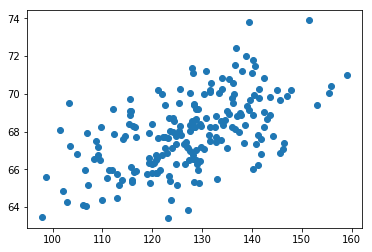

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.array(_weightRdd), np.array(_heightRdd),'o')
plt.show()

그래프 그리기 중요하다

In [34]:
jfile= os.path.join(os.environ["SPARK_HOME"],\
           "examples/src/main/resources/people.json")

_myDf= spark.read.json(jfile)

In [35]:
_myDf.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [36]:
_myDf.filter(_myDf['age'] > 21).show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



In [37]:
_myDf.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [39]:
import requests
#list 형식으로 작성된 데이터
r=requests.get("https://raw.githubusercontent.com/jokecamp/FootballData/master/World%20Cups/all-world-cup-players.json")
wc=r.json()
# 한번 저장해두고 사용하는 것이 좋음 사이트에 한번식 들렸다가 오는 것이라서 시간이 오래걸림

In [40]:
print type(wc), type(wc[0])

<type 'list'> <type 'dict'>


In [41]:
wc[0]

{u'Club': u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada',
 u'ClubCountry': u'Argentina',
 u'Competition': u'World Cup',
 u'DateOfBirth': u'1905-5-5',
 u'FullName': u'\xc3ngel Bossio',
 u'IsCaptain': False,
 u'Number': u'',
 u'Position': u'GK',
 u'Team': u'Argentina',
 u'Year': 1930}

web data는 숫자가 없음 모두 문자!
문자열을 json으로 변경할 시 parsing이 필수다!

In [43]:
wcDF=spark.createDataFrame(wc)

In [44]:
wcDF.printSchema()

root
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)



In [45]:
wcDF.take(1)

[Row(Club=u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada', ClubCountry=u'Argentina', Competition=u'World Cup', DateOfBirth=u'1905-5-5', FullName=u'\xc3ngel Bossio', IsCaptain=False, Number=u'', Position=u'GK', Team=u'Argentina', Year=1930)]

In [47]:
wcDF.show(1)

+--------------------+-----------+-----------+-----------+------------+---------+------+--------+---------+----+
|                Club|ClubCountry|Competition|DateOfBirth|    FullName|IsCaptain|Number|Position|     Team|Year|
+--------------------+-----------+-----------+-----------+------------+---------+------+--------+---------+----+
|Club AtlÃ©tico Ta...|  Argentina|  World Cup|   1905-5-5|Ãngel Bossio|    false|      |      GK|Argentina|1930|
+--------------------+-----------+-----------+-----------+------------+---------+------+--------+---------+----+
only showing top 1 row



In [50]:
wcRdd=spark.sparkContext.parallelize(wc)

In [51]:
wcRdd.take(1)

[{u'Club': u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada',
  u'ClubCountry': u'Argentina',
  u'Competition': u'World Cup',
  u'DateOfBirth': u'1905-5-5',
  u'FullName': u'\xc3ngel Bossio',
  u'IsCaptain': False,
  u'Number': u'',
  u'Position': u'GK',
  u'Team': u'Argentina',
  u'Year': 1930}]

In [52]:
from pyspark.sql.types import *
wcSchema=StructType([
    StructField("Club", StringType(), True),
    StructField("ClubCountry", StringType(), True),
    StructField("Competition", StringType(), True),
    StructField("DateOfBirth", DateType(), True),
    StructField("FullName", StringType(), True),
    StructField("IsCaptain", BooleanType(), True),
    StructField("Number", IntegerType(), True),
    StructField("Position", StringType(), True),
    StructField("Team", StringType(), True),
    StructField("Year", IntegerType(), True)
])

In [59]:
wcDF=spark.createDataFrame(wcRdd,wcSchema)

In [54]:
wcDF.printSchema()

root
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: date (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: integer (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: integer (nullable = true)



In [58]:
_wcDF=spark.createDataFrame(wcRdd)

In [60]:
_wcDF.printSchema()

root
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)



In [61]:
_wcDF.take(1)

[Row(Club=u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada', ClubCountry=u'Argentina', Competition=u'World Cup', DateOfBirth=u'1905-5-5', FullName=u'\xc3ngel Bossio', IsCaptain=False, Number=u'', Position=u'GK', Team=u'Argentina', Year=1930)]

In [62]:
wcDF.take(1)

Py4JJavaError: An error occurred while calling z:org.apache.spark.sql.execution.python.EvaluatePython.takeAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 34.0 failed 1 times, most recent failure: Lost task 0.0 in stage 34.0 (TID 231, localhost): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "C:\Users\qorgk\spark-2.0.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 172, in main
  File "C:\Users\qorgk\spark-2.0.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 167, in process
  File "C:\Users\qorgk\spark-2.0.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "C:\Users\qorgk\spark-2.0.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\sql\session.py", line 505, in prepare
  File "C:\Users\qorgk\spark-2.0.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\sql\types.py", line 1317, in _verify_type
    raise TypeError("StructType can not accept object %r in type %s" % (obj, type(obj)))
TypeError: StructType can not accept object {u'Club': u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada', u'ClubCountry': u'Argentina', u'Team': u'Argentina', u'Number': u'', u'Competition': u'World Cup', u'DateOfBirth': u'1905-5-5', u'Year': 1930, u'Position': u'GK', u'FullName': u'\xc3ngel Bossio', u'IsCaptain': False} in type <type 'dict'>

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:85)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1167)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:641)
	at java.base/java.lang.Thread.run(Thread.java:844)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1450)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1438)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1437)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1437)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1659)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1618)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1607)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:632)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1871)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1884)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1897)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:347)
	at org.apache.spark.sql.execution.python.EvaluatePython$$anonfun$takeAndServe$1.apply$mcI$sp(EvaluatePython.scala:41)
	at org.apache.spark.sql.execution.python.EvaluatePython$$anonfun$takeAndServe$1.apply(EvaluatePython.scala:39)
	at org.apache.spark.sql.execution.python.EvaluatePython$$anonfun$takeAndServe$1.apply(EvaluatePython.scala:39)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:57)
	at org.apache.spark.sql.Dataset.withNewExecutionId(Dataset.scala:2532)
	at org.apache.spark.sql.execution.python.EvaluatePython$.takeAndServe(EvaluatePython.scala:39)
	at org.apache.spark.sql.execution.python.EvaluatePython.takeAndServe(EvaluatePython.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:564)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:237)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:128)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:211)
	at java.base/java.lang.Thread.run(Thread.java:844)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "C:\Users\qorgk\spark-2.0.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 172, in main
  File "C:\Users\qorgk\spark-2.0.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 167, in process
  File "C:\Users\qorgk\spark-2.0.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "C:\Users\qorgk\spark-2.0.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\sql\session.py", line 505, in prepare
  File "C:\Users\qorgk\spark-2.0.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\sql\types.py", line 1317, in _verify_type
    raise TypeError("StructType can not accept object %r in type %s" % (obj, type(obj)))
TypeError: StructType can not accept object {u'Club': u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada', u'ClubCountry': u'Argentina', u'Team': u'Argentina', u'Number': u'', u'Competition': u'World Cup', u'DateOfBirth': u'1905-5-5', u'Year': 1930, u'Position': u'GK', u'FullName': u'\xc3ngel Bossio', u'IsCaptain': False} in type <type 'dict'>

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:85)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1167)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:641)
	... 1 more


In [63]:
from datetime import datetime
print datetime.strptime("11/25/1991", '%m/%d/%Y')

1991-11-25 00:00:00


In [64]:
from pyspark.sql.functions import udf
toDate = udf(lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())

In [66]:
_wcDF = _wcDF.withColumn('date1', toDate(_wcDF['DateOfBirth']))

In [67]:
_wcDF.printSchema()

root
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- date1: date (nullable = true)



In [75]:
from pyspark.sql.functions import to_date

_wcDF=_wcDF.withColumn('date2', to_date(_wcDF['DateOfBirth']))

In [69]:
from pyspark.sql.types import DateType

_wcDF=_wcDF.withColumn('date3', _wcDF['DateOfBirth'].cast(DateType()))
_wcDF=_wcDF.withColumn('NumberInt', _wcDF['Number'].cast("integer"))

In [76]:
_wcDF.printSchema()

root
 |-- Club: string (nullable = true)
 |-- ClubCountry: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- date1: date (nullable = true)
 |-- date3: date (nullable = true)
 |-- NumberInt: integer (nullable = true)
 |-- date2: date (nullable = true)



In [92]:
_wcDF=_wcDF.drop('date1')

In [93]:
_wcDF.take(1)

[Row(Club=u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada', ClubNation=u'Argentina', Competition=u'World Cup', DateOfBirth=u'1905-5-5', FullName=u'\xc3ngel Bossio', IsCaptain=False, Number=u'', Position=u'GK', Team=u'Argentina', Year=1930, date3=datetime.date(1905, 5, 5), NumberInt=None, date2=datetime.date(1905, 5, 5))]

In [72]:
_wcDF.groupBy(_wcDF.ClubCountry).count().show()

+-----------+-----+
|ClubCountry|count|
+-----------+-----+
|   England |    4|
|   Paraguay|   93|
|     Russia|   51|
|        POL|   11|
|        BRA|   27|
|    Senegal|    1|
|     Sweden|  154|
|   Colombia|    1|
|        FRA|  155|
|        ALG|    8|
|   England |    1|
|       RUS |    1|
|     Turkey|   65|
|      Zaire|   22|
|       Iraq|   22|
|    Germany|  206|
|        RSA|   16|
|        ITA|  224|
|        UKR|   38|
|        GHA|    8|
+-----------+-----+
only showing top 20 rows



In [73]:
_wcDF.groupBy('ClubCountry').pivot('Position').count().show()

+-----------+----+----+----+----+----+
|ClubCountry|    |  DF|  FW|  GK|  MF|
+-----------+----+----+----+----+----+
|   England |null|null|   2|null|   2|
|   Paraguay|null|  26|  37|  10|  20|
|     Russia|null|  20|  11|   4|  16|
|        POL|null|   2|   2|   3|   4|
|        BRA|null|   7|   5|   4|  11|
|    Senegal|null|null|null|   1|null|
|     Sweden|null|  40|  47|  25|  42|
|   Colombia|null|null|   1|null|null|
|        ALG|null|   2|null|   6|null|
|        FRA|null|  46|  41|  18|  50|
|   England |null|null|null|null|   1|
|       RUS |null|null|null|   1|null|
|     Turkey|null|  20|  13|  12|  20|
|      Zaire|null|   6|   5|   3|   8|
|       Iraq|null|   6|   4|   3|   9|
|    Germany|null|  64|  51|  16|  75|
|        RSA|null|   5|   2|   3|   6|
|        UKR|null|  13|   7|   4|  14|
|        ITA|null|  74|  42|  19|  89|
|        CMR|null|   1|   1|   1|null|
+-----------+----+----+----+----+----+
only showing top 20 rows



In [82]:
myDf = spark.read.format('com.databricks.spark.csv')\
    .options(header='true', inferschema='true').load('data/myDf.csv')

In [83]:
myDf.printSchema()
myDf.show()

root
 |-- _c0: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- height: integer (nullable = true)

+---+----+-------+------+
|_c0|year|   name|height|
+---+----+-------+------+
|  0|   1|kim, js|   170|
|  1|   1|lee, sm|   175|
|  2|   2|lim, yg|   180|
|  3|   2|    lee|   170|
+---+----+-------+------+



In [86]:
_wcDF=_wcDF.withColumnRenamed('ClubCountry','ClubNation')

In [87]:
_wcDF.printSchema()

root
 |-- Club: string (nullable = true)
 |-- ClubNation: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- date1: date (nullable = true)
 |-- date3: date (nullable = true)
 |-- NumberInt: integer (nullable = true)
 |-- date2: date (nullable = true)



In [88]:
myDf.name

Column<name>

In [89]:
myDf['name']

Column<name>

In [90]:
_name=myDf.select('name')
_name.collect()

[Row(name=u'kim, js'),
 Row(name=u'lee, sm'),
 Row(name=u'lim, yg'),
 Row(name=u'lee')]

In [91]:
r=Row(name=u'kim, js')
rd=r.asDict()
print rd.values()[0].split(',')

[u'kim', u' js']


In [94]:
#where 행 select 열
myDf.where(myDf['height'] < 175)\
    .select(myDf['name'], myDf['height']).show()

+-------+------+
|   name|height|
+-------+------+
|kim, js|   170|
|    lee|   170|
+-------+------+



In [95]:
myDf.groupby(myDf['year']).max().show()

+----+--------+---------+-----------+
|year|max(_c0)|max(year)|max(height)|
+----+--------+---------+-----------+
|   1|       1|        1|        175|
|   2|       3|        2|        180|
+----+--------+---------+-----------+



In [96]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
##udf(lambda파라미터, return, return type)
toDoublefunc = udf(lambda x: float(x),DoubleType())
myDf = myDf.withColumn("heightD",toDoublefunc(myDf.height))

In [97]:
myDf.printSchema()
myDf.show()

root
 |-- _c0: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- height: integer (nullable = true)
 |-- heightD: double (nullable = true)

+---+----+-------+------+-------+
|_c0|year|   name|height|heightD|
+---+----+-------+------+-------+
|  0|   1|kim, js|   170|  170.0|
|  1|   1|lee, sm|   175|  175.0|
|  2|   2|lim, yg|   180|  180.0|
|  3|   2|    lee|   170|  170.0|
+---+----+-------+------+-------+



In [98]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf
 
def uppercase(s):
    return s.upper()

upperUdf = udf(uppercase, StringType())
myDf = myDf.withColumn("nameUpper", upperUdf(myDf['name']))
myDf.show()

+---+----+-------+------+-------+---------+
|_c0|year|   name|height|heightD|nameUpper|
+---+----+-------+------+-------+---------+
|  0|   1|kim, js|   170|  170.0|  KIM, JS|
|  1|   1|lee, sm|   175|  175.0|  LEE, SM|
|  2|   2|lim, yg|   180|  180.0|  LIM, YG|
|  3|   2|    lee|   170|  170.0|      LEE|
+---+----+-------+------+-------+---------+



In [99]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

upperUdf = udf(lambda x : x.upper(), StringType())
myDf = myDf.withColumn("nameUpper2", upperUdf(myDf['name']))
myDf.show()

+---+----+-------+------+-------+---------+----------+
|_c0|year|   name|height|heightD|nameUpper|nameUpper2|
+---+----+-------+------+-------+---------+----------+
|  0|   1|kim, js|   170|  170.0|  KIM, JS|   KIM, JS|
|  1|   1|lee, sm|   175|  175.0|  LEE, SM|   LEE, SM|
|  2|   2|lim, yg|   180|  180.0|  LIM, YG|   LIM, YG|
|  3|   2|    lee|   170|  170.0|      LEE|       LEE|
+---+----+-------+------+-------+---------+----------+



In [100]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

height_udf = udf(lambda height: "taller" if height >=175 else "shorter", StringType())
heightDf=myDf.withColumn("height>175", height_udf(myDf.heightD))
heightDf.show()

+---+----+-------+------+-------+---------+----------+----------+
|_c0|year|   name|height|heightD|nameUpper|nameUpper2|height>175|
+---+----+-------+------+-------+---------+----------+----------+
|  0|   1|kim, js|   170|  170.0|  KIM, JS|   KIM, JS|   shorter|
|  1|   1|lee, sm|   175|  175.0|  LEE, SM|   LEE, SM|    taller|
|  2|   2|lim, yg|   180|  180.0|  LIM, YG|   LIM, YG|    taller|
|  3|   2|    lee|   170|  170.0|      LEE|       LEE|   shorter|
+---+----+-------+------+-------+---------+----------+----------+



In [103]:
myDf = myDf.drop('nameUpper2')

In [104]:
myDf.show()

+---+----+-------+------+-------+---------+
|_c0|year|   name|height|heightD|nameUpper|
+---+----+-------+------+-------+---------+
|  0|   1|kim, js|   170|  170.0|  KIM, JS|
|  1|   1|lee, sm|   175|  175.0|  LEE, SM|
|  2|   2|lim, yg|   180|  180.0|  LIM, YG|
|  3|   2|    lee|   170|  170.0|      LEE|
+---+----+-------+------+-------+---------+



In [105]:
myDf.describe().show()

+-------+------------------+------------------+------------------+------------------+
|summary|               _c0|              year|            height|           heightD|
+-------+------------------+------------------+------------------+------------------+
|  count|                 4|                 4|                 4|                 4|
|   mean|               1.5|               1.5|            173.75|            173.75|
| stddev|1.2909944487358056|0.5773502691896257|4.7871355387816905|4.7871355387816905|
|    min|                 0|                 1|               170|             170.0|
|    max|                 3|                 2|               180|             180.0|
+-------+------------------+------------------+------------------+------------------+



In [106]:
_wcDF.printSchema()

root
 |-- Club: string (nullable = true)
 |-- ClubNation: string (nullable = true)
 |-- Competition: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- FullName: string (nullable = true)
 |-- IsCaptain: boolean (nullable = true)
 |-- Number: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- date3: date (nullable = true)
 |-- NumberInt: integer (nullable = true)
 |-- date2: date (nullable = true)



In [108]:
_wcDF = _wcDF.drop('date2')
_wcDF = _wcDF.drop('date3')

In [110]:
_wcDF.createOrReplaceTempView("wc")
spark.sql("select Club,Team,Year from wc").show()

+--------------------+---------+----+
|                Club|     Team|Year|
+--------------------+---------+----+
|Club AtlÃ©tico Ta...|Argentina|1930|
|Quilmes AtlÃ©tico...|Argentina|1930|
|          Boca Junio|Argentina|1930|
|Central Norte TucumÃ|Argentina|1930|
|Club Atletico Est...|Argentina|1930|
|Racing Club de Av...|Argentina|1930|
|     Sportivo Barrac|Argentina|1930|
|          Boca Junio|Argentina|1930|
|Estudiantes de La...|Argentina|1930|
|Club AtlÃ©tico Sa...|Argentina|1930|
|          Boca Junio|Argentina|1930|
|Club Atletico Est...|Argentina|1930|
|Racing Club de Av...|Argentina|1930|
|Racing Club de Av...|Argentina|1930|
|Club Sportivo Bue...|Argentina|1930|
|Club AtlÃ©tico La...|Argentina|1930|
|Estudiantes de La...|Argentina|1930|
|Club AtlÃ©tico La...|Argentina|1930|
|Club AtlÃ©tico Hu...|Argentina|1930|
|          Boca Junio|Argentina|1930|
+--------------------+---------+----+
only showing top 20 rows



In [111]:
wcPlayers=spark.sql("select FullName,Club,Team,Year from wc")
wcPlayers.show(1)

+------------+--------------------+---------+----+
|    FullName|                Club|     Team|Year|
+------------+--------------------+---------+----+
|Ãngel Bossio|Club AtlÃ©tico Ta...|Argentina|1930|
+------------+--------------------+---------+----+
only showing top 1 row



In [112]:
spark.catalog.listTables()

[Table(name=u'wc', database=None, description=None, tableType=u'TEMPORARY', isTemporary=True)]

In [113]:
namesRdd=wcPlayers.rdd.map(lambda x: "Full name: "+x[0])
#for문으로 보지 않으면 유니코드가 깨져서 나옴
for e in namesRdd.take(5):
    print e

Full name: Ãngel Bossio
Full name: Juan Botasso
Full name: Roberto Cherro
Full name: Alberto Chividini
Full name: 


In [114]:
bucketDf=spark.createDataFrame([[1,["orange", "apple", "pineapple"]],
                                [2,["watermelon","apple","bananas"]]],
                               ["bucketId","items"])
bucketDf.show(truncate=False)

+--------+----------------------------+
|bucketId|items                       |
+--------+----------------------------+
|1       |[orange, apple, pineapple]  |
|2       |[watermelon, apple, bananas]|
+--------+----------------------------+



In [115]:
from pyspark.sql.functions import explode
bDf=bucketDf.select(bucketDf.bucketId,explode(bucketDf.items).alias('item'))
bDf.show()

+--------+----------+
|bucketId|      item|
+--------+----------+
|       1|    orange|
|       1|     apple|
|       1| pineapple|
|       2|watermelon|
|       2|     apple|
|       2|   bananas|
+--------+----------+



In [118]:
fDf=spark.createDataFrame([["orange", "F1"],
                            ["apple", "F2"],
                            ["pineapple","F3"],
                            ["watermelon","F4"],
                            ["bananas","F5"]],
                            ["item","itemId"])
fDf.show()

+----------+------+
|      item|itemId|
+----------+------+
|    orange|    F1|
|     apple|    F2|
| pineapple|    F3|
|watermelon|    F4|
|   bananas|    F5|
+----------+------+



In [119]:
joinDf=fDf.join(bDf, fDf.item==bDf.item, "inner")
joinDf.select(fDf.itemId,fDf.item,bDf.bucketId).show()

+------+----------+--------+
|itemId|      item|bucketId|
+------+----------+--------+
|    F5|   bananas|       2|
|    F1|    orange|       1|
|    F2|     apple|       1|
|    F2|     apple|       2|
|    F3| pineapple|       1|
|    F4|watermelon|       2|
+------+----------+--------+



In [120]:
myDf.show()

+---+----+-------+------+-------+---------+
|_c0|year|   name|height|heightD|nameUpper|
+---+----+-------+------+-------+---------+
|  0|   1|kim, js|   170|  170.0|  KIM, JS|
|  1|   1|lee, sm|   175|  175.0|  LEE, SM|
|  2|   2|lim, yg|   180|  180.0|  LIM, YG|
|  3|   2|    lee|   170|  170.0|      LEE|
+---+----+-------+------+-------+---------+



In [121]:
from pyspark.sql.functions import when
_myDf=myDf.select(when(myDf['heightD'] >175.0, ">175")\
            .otherwise("<175").alias("how tall"))
_myDf.show()

+--------+
|how tall|
+--------+
|    <175|
|    <175|
|    >175|
|    <175|
+--------+



In [122]:
myDf.groupBy('year').agg({"heightD":"avg"}).show()

+----+------------+
|year|avg(heightD)|
+----+------------+
|   1|       172.5|
|   2|       175.0|
+----+------------+



In [124]:
from pyspark.sql import functions as F

a=myDf.agg(F.min(myDf.heightD),F.max(myDf.heightD),F.avg(myDf.heightD),F.sum(myDf.heightD))

In [125]:
a.show()

+------------+------------+------------+------------+
|min(heightD)|max(heightD)|avg(heightD)|sum(heightD)|
+------------+------------+------------+------------+
|       170.0|       180.0|      173.75|       695.0|
+------------+------------+------------+------------+

